In [13]:
from SloppyCell.ReactionNetworks import *
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import warnings
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
## load full model and set dynamic vars
model = IO.from_SBML_file('../model/model.xml', id='full_model')
dyn_vars =  ['paurb', 'pmelt_bub1','pmelt_bub1_pp2a', 'pmelt', 'rvsf', 'rvsf_pp1']
nonvars = list(set(model.dynamicVars.keys()) - set(dyn_vars))
for key in nonvars:
    model.set_var_constant(key, is_constant=True)
    model.set_var_optimizable(key, is_optimizable=False)
for var in ['pp1_tot', 'bub1_tot', 'pp2a_tot', 'kln1_tot', 'aurb_tot']:
    model.set_var_optimizable(var, False)

In [3]:
## generate all possible models
## ids are strings of 1/0 indicating presence/absence of reactions
phospho_pars = [
    ['kdp_rvsf_pp1', 'kdp_rvsf_pp2a'],
     ['kp_aurb_bub1','kp_aurb_aurb'],
     ['kdp_aurb_pp1','kdp_aurb_pp2a']]
models = {}
alf = ['01','10','11']
model_iterator = it.product(alf,repeat=3)
for m_i in model_iterator:
    id = ''.join(m_i)
    model_it = model.copy(new_id='model_'+id)
    for i in range(len(m_i)):
        pars = phospho_pars[i]
        for j in range(len(m_i[i])):
            val = float(m_i[i][j])
            model_it.set_var_ic(pars[j], val)
            model_it.set_var_optimizable(pars[j], bool(val))
    models[id] = model_it

In [235]:
model_ic = model.copy(new_id='full_ic')
model_id = 'full_ic'
expt_ic = Experiment('ic')
data_ic = {model_id:{
    'prvsf': {100: (0.5, 0.1),
            1000: (0.5, 0.1),},              
    'pmelt_tot' : {100: (0.5, 0.1),
            1100: (0.5, 0.1),},                              
                             }
                }
expt_ic.set_data(data_ic)
expt_ic.set_fixed_sf({'prvsf': 1, 'pmelt_tot': 1})

In [237]:
model_dkard_ic = model.copy(new_id='dkard_ic')
model_dkard_ic.set_var_ic('pmelt_bub1_pp2a', 0)
model_dkard_ic.set_var_ic('kb_pmelt_bub1_pp2a', 0)
model_dkard_ic.set_var_ic('kd_pmelt_bub1_pp2a', 0)
model_id = 'dkard_ic'
expt_dkard_ic = Experiment('dkard_ic')
data_dkard_ic = {model_id:{
    'prvsf': {100: (1, 0.1),
            1000: (1, 0.1),},              
    'pmelt_tot' : {100: (1, 0.1),
            1100: (1, 0.1),},                              
                             }
                }
expt_dkard_ic.set_data(data_dkard_ic)
expt_dkard_ic.set_fixed_sf({'prvsf': 1, 'pmelt_tot': 1})

In [228]:
model_mps1 = model.copy(new_id='full_mps1')
model_mps1.set_var_constant('mps1', is_constant=False)
model_mps1.add_event(id='mps1_inhibition', trigger='gt(time, 1000)', event_assignments={'mps1': 0})
model_id = 'full_mps1'
expt_mps1 = Experiment('mps1_inhibition')
data_mps1 = {model_id:{
    'prvsf': {100: (1, 0.1),
            1000: (1, 0.1),},              
    'pmelt_tot' : {100: (1, 0.1),
            1100: (0, 0.1),},                              
                             }
                }
expt_mps1.set_data(data_mps1)

In [229]:
model_aurb = model.copy(new_id='full_aurb')
model_aurb.set_var_constant('paurb', is_constant=False)
model_aurb.set_var_constant('aurb_tot', is_constant=False)
model_aurb.add_event(id='aurb_inhibition', trigger='gt(time, 1000)', event_assignments={'paurb': 0, 'aurb_tot': 0})
model_id = 'full_aurb'
expt_aurb = Experiment('aurb_inhibition')
data_aurb = {model_id:{            
    'pmelt_tot' : {100: (1, 0.1),
            1100: (0, 0.1),},                              
                             }
                }
expt_aurb.set_data(data_aurb)

In [230]:
model_dkard_aurb = model.copy(new_id='dkard_aurb')
model_dkard_aurb.set_var_ic('pmelt_bub1_pp2a', 0)
model_dkard_aurb.set_var_ic('kb_pmelt_bub1_pp2a', 0)
model_dkard_aurb.set_var_ic('kd_pmelt_bub1_pp2a', 0)
model_dkard_aurb.set_var_constant('paurb', is_constant=False)
model_dkard_aurb.set_var_constant('aurb_tot', is_constant=False)
model_dkard_aurb.add_event(id='aurb_inhibition', trigger='gt(time, 1000)', event_assignments={'paurb': 0, 'aurb_tot': 0})
model_id = 'dkard_aurb'
expt_dkard_aurb = Experiment('dkard_aurb_inhibition')
data_dkard_aurb = {model_id:{            
    'rvsf_tot' : {100: (1, 0.1),
            1100: (0, 0.1),},                              
                             }
                }
expt_dkard_aurb.set_data(data_dkard_aurb)

In [231]:
model_mps1_aurb = model.copy(new_id='full_mps1_aurb')
model_mps1_aurb.set_var_constant('mps1', is_constant=False)
model_mps1_aurb.add_event(id='mps1_inhibition', trigger='gt(time, 1000)', event_assignments={'mps1': 0})
model_mps1_aurb.set_var_constant('paurb', is_constant=False)
model_mps1_aurb.set_var_constant('aurb_tot', is_constant=False)
model_mps1_aurb.add_event(id='aurb_inhibition', trigger='gt(time, 1000)', event_assignments={'paurb': 0, 'aurb_tot': 0})
model_id = 'full_mps1_aurb'
expt_mps1_aurb = Experiment('mps1_aurb_inhibition')
data_mps1_aurb = {model_id:{            
    'pmelt_tot' : {100: (1, 0.1),
            1100: (0, 0.1),},                              
                             }
                }
expt_mps1_aurb.set_data(data_mps1_aurb)

In [232]:
model_dkard_mps1_aurb = model.copy(new_id='dkard_mps1_aurb')
model_dkard_mps1_aurb.set_var_ic('pp2a_tot', 0)
model_dkard_mps1_aurb.set_var_ic('pmelt_bub1_pp2a', 0)
model_dkard_mps1_aurb.set_var_ic('kb_pmelt_bub1_pp2a', 0)
model_dkard_mps1_aurb.set_var_ic('kd_pmelt_bub1_pp2a', 0)
model_dkard_mps1_aurb.set_var_constant('mps1', is_constant=False)
model_dkard_mps1_aurb.add_event(id='mps1_inhibition', trigger='gt(time, 1000)', event_assignments={'mps1': 0})
model_dkard_mps1_aurb.set_var_constant('paurb', is_constant=False)
model_dkard_mps1_aurb.set_var_constant('aurb_tot', is_constant=False)
model_dkard_mps1_aurb.add_event(id='aurb_inhibition', trigger='gt(time, 1000)', event_assignments={'paurb': 0, 'aurb_tot': 0})
model_id = 'dkard_mps1_aurb'
expt_dkard_mps1_aurb = Experiment('dkard_mps1_aurb_inhibition')
data_dkard_mps1_aurb = {model_id:{            
    'rvsf_tot' : {100: (1, 0.1),
            1100: (0, 0.1),},                              
                             }
                }
expt_dkard_mps1_aurb.set_data(data_dkard_mps1_aurb)

In [238]:
m_ic = Model([expt_ic, expt_dkard_ic],[model_ic, model_dkard_ic])
params = KeyedList()
for p,val in model.optimizableVars.items():    
    params.setByKey(p, val.initialValue)
    res = Residuals.PriorInLog(p+'_prior', p, log(val.initialValue), log(sqrt(1000)))
    m_ic.AddResidual(res)

In [242]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    params_ic_opt = Optimization.fmin_lm_log_params(m_ic, params, maxiter=200, disp=True)

Iteration number 0
Current cost 270.118782127
Move 1 gives cost of 264.292017111
Move 2 gives cost of  177.266405954
Iteration number 1
Current cost 177.266405954
Move 1 gives cost of 77.3357087803
Move 2 gives cost of  75.0858119017
Iteration number 2
Current cost 75.0858119017
Move 1 gives cost of 65.7353998619
Move 2 gives cost of  242.785846426
Iteration number 3
Current cost 65.7353998619
Move 1 gives cost of 57.0844091083
Move 2 gives cost of  86.2943891619
Iteration number 4
Current cost 57.0844091083
Move 1 gives cost of 50.9230683826
Move 2 gives cost of  50.9646057044
Iteration number 5
Current cost 50.9646057044
Move 1 gives cost of 50.8353115369
Move 2 gives cost of  50.8428359777
Iteration number 6
Current cost 50.8428359777
Move 1 gives cost of 50.8402835913
Move 2 gives cost of  50.8486914715
Iteration number 7
Current cost 50.8402835913
Move 1 gives cost of 50.8392687526
Move 2 gives cost of  50.846125815
Iteration number 8
Current cost 50.8392687526
Move 1 gives cost o

KeyboardInterrupt: 

(0, 1)

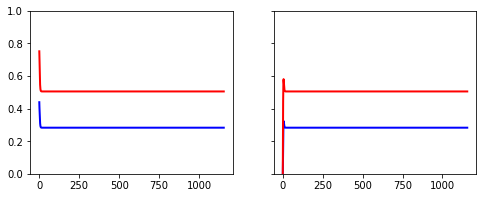

In [243]:
ics = model_ic.dynamicVars.copy()
fp = Dynamics.dyn_var_fixed_point(model_ic)
for i in range(len(ics)):
    ics[i] = fp[i]
model_ic.set_var_ics(ics)
traj = model_ic.integrate(np.linspace(0,1100,101), params_ic_opt)
traj_dkard = model_dkard_ic.integrate(np.linspace(0,1100,101), params_ic_opt)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3),sharex=True, sharey=True)
ax1.plot(traj.timepoints, traj.get_var_traj('pmelt_bub1_pp2a'), 'b-')
ax1.plot(traj.timepoints, traj.get_var_traj('pmelt_tot'), 'r-')
ax2.plot(traj_dkard.timepoints, traj_dkard.get_var_traj('pmelt_bub1_pp2a'), 'b-')
ax2.plot(traj_dkard.timepoints, traj_dkard.get_var_traj('pmelt_tot'), 'r-')
ax1.set_ylim([0,1])

In [178]:
model_ic_c = model.copy(new_id='model_ic_c')
model_ic_c.set_var_ics(ics)
model_ic_c.add_constraint(id='rvsf03', trigger='lt(time, 100.0) or gt(prvsf, 0.3)')
model_ic_c.add_constraint(id='melt03', trigger='lt(time, 100.0) or gt(pmelt_tot, 0.3)')
model_id = 'model_ic_c'
expt_ic_c = Experiment('fit_ic_c')
data_ic_c = {model_id:{
    'prvsf': {100: (0.5, 1000),
            1100: (0.5, 1000),},              
    'pmelt_tot' : {100: (0.5, 1000),
            1100: (0.5, 1000),},                              
                             }
                }
expt_ic_c.set_data(data_ic_c)

In [210]:
model_dkard_ic_c = model.copy(new_id='model_dkard_ic_c')
model_dkard_ic_c.set_var_ics(ics)
model_dkard_ic_c.add_constraint(id='rvsf03', trigger='lt(time, 100.0) or gt(prvsf, 0.8)')
model_dkard_ic_c.add_constraint(id='melt03', trigger='lt(time, 100.0) or gt(pmelt_tot, 0.8)')
model_id = 'model_dkard_ic_c'
expt_dkard_ic_c = Experiment('fit_dkard_ic_c')
data_dkard_ic_c = {model_id:{
    'prvsf': {100: (0.8, 1000),
            1100: (0.8, 1000),},              
    'pmelt_tot' : {100: (0.8, 1000),
            1100: (0.8, 1000),},                              
                             }
                }
expt_dkard_ic_c.set_data(data_dkard_ic_c)

In [211]:
m = Model([expt_ic_c, expt_dkard_ic_c, expt_mps1, expt_aurb, expt_dkard_aurb, expt_mps1_aurb, expt_dkard_mps1_aurb],
          [model_ic_c, model_dkard_ic_c, model_mps1, model_aurb, model_dkard_aurb, model_mps1_aurb, model_dkard_mps1_aurb])
params = KeyedList()
for p,val in model.optimizableVars.items():    
    params.setByKey(p, val.initialValue)
    res = Residuals.PriorInLog(p+'_prior', p, log(val.initialValue), log(sqrt(1000)))
    m.AddResidual(res)

In [198]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    params_opt = Optimization.fmin_lm_log_params(m, params_ic_opt, maxiter=200, disp=True)

running build_ext
running build_src
build_src
building extension "full_mps1_aurb_0_fridolismacbook_74_1503572151_3149" sources
f2py options: []
f2py: full_mps1_aurb_0_fridolismacbook_74_1503572151_3149.pyf
Reading fortran codes...
	Reading file 'full_mps1_aurb_0_fridolismacbook_74_1503572151_3149.pyf' (format:free)
Post-processing...
	Block: full_mps1_aurb_0_fridolismacbook_74_1503572151_3149
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a


In file included from full_mps1_aurb_0_fridolismacbook_74_1503572151_3149module.c:19:
In file included from build/src.macosx-10.10-x86_64-2.7/./fortranobject.h:13:
In file included from /usr/local/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /usr/local/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18:
In file included from /usr/local/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:
/usr/local/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: "Using deprecated NumPy API, disable it by "          "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it by " \
 ^
full_mps1_aurb_0_fridolismacbook_74_1503572151_3149module.c:105:12: warning: unused function 'f2py_size' [-Wunused-function]
static int f2py_size(PyArrayObject* var, ...)
           ^
2 warnings generated.
clang -bundle -undefined dyna

In [240]:
traj_c = Dynamics.integrate(model_ic_c, [0,1100], params=params_opt, use_constraints=False)
traj_mps1 = Dynamics.integrate(model_mps1, [0,1100], params=params_opt)
traj_aurb = Dynamics.integrate(model_aurb,[0,1100], params=params_opt)
traj_mps1_aurb = Dynamics.integrate(model_mps1_aurb,[0,1100], params=params_opt)

(990, 1050)

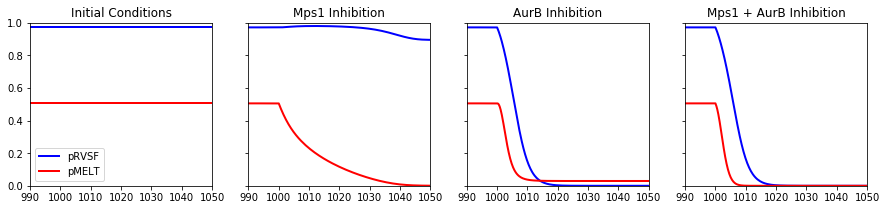

In [241]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,3), sharey=True, sharex=True)
ax1.plot(traj_c.timepoints, traj_c.get_var_traj('prvsf'), 'b-', label='pRVSF')
ax1.plot(traj_c.timepoints, traj_c.get_var_traj('pmelt_tot'), 'r-', label='pMELT')
ax1.set_title('Initial Conditions')
ax1.legend(loc=3)
ax2.plot(traj_mps1.timepoints, traj_mps1.get_var_traj('prvsf'), 'b-')
ax2.plot(traj_mps1.timepoints, traj_mps1.get_var_traj('pmelt_tot'), 'r-')
ax2.set_title('Mps1 Inhibition')
ax3.plot(traj_aurb.timepoints, traj_aurb.get_var_traj('prvsf'), 'b-')
ax3.plot(traj_aurb.timepoints, traj_aurb.get_var_traj('pmelt_tot'), 'r-')
ax3.set_title('AurB Inhibition')
ax4.plot(traj_mps1_aurb.timepoints, traj_mps1_aurb.get_var_traj('prvsf'), 'b-')
ax4.plot(traj_mps1_aurb.timepoints, traj_mps1_aurb.get_var_traj('pmelt_tot'), 'r-')
ax4.set_title('Mps1 + AurB Inhibition')
ax1.set_ylim([0,1])
ax1.set_xlim([990,1050])

In [189]:
traj = model_aurb.integrate([0,1100], params_opt)

In [204]:
model.get_var_ics()

KeyedList([('cOne', 1.0), ('pp1', 10.0), ('rvsf', 0.0), ('prvsf', 1.0), ('pp2a', 10.0), ('melt', 1.0), ('pmelt', 0.0), ('bub1', 10.0), ('aurb', 1.0), ('paurb', 0.0), ('mps1', 1.0), ('pmelt_bub1', 0.0), ('pmelt_bub1_pp2a', 0.0), ('rvsf_pp1', 0.0), ('pmelt_tot', 1.0), ('kb_rvsf_pp1', 1.0), ('kd_rvsf_pp1', 1.0), ('kb_pmelt_bub1', 1.0), ('kd_pmelt_bub1', 1.0), ('kb_pmelt_bub1_pp2a', 1.0), ('kd_pmelt_bub1_pp2a', 1.0), ('kp_melt', 1.0), ('kdp_melt', 1.0), ('kp_rvsf', 1.0), ('kdp_rvsf_pp2a', 1.0), ('kdp_rvsf_pp1', 1.0), ('kp_aurb_bub1', 1.0), ('kp_aurb_aurb', 1.0), ('kdp_aurb_pp1', 1.0), ('kdp_aurb_pp2a', 1.0), ('pp1_tot', 10.0), ('bub1_tot', 10.0), ('pp2a_tot', 10.0), ('kln1_tot', 1.0), ('aurb_tot', 1.0)])